# Lab 4: Solving ODE

In [1]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Exercise 1

### Part 1

Write a function for Euler methods.

In [19]:
#Euler method:

def eulermethod(f, n, y0, t0, T):
    t = np.zeros(n+1,dtype=np.float32)
    y = np.zeros(n+1,dtype=np.float32)
    h = (T - t0)/n
    y[0] = y0
    t[0] = t0
    for i in range(1, n+1):
        t[i] = t0 + i*h
        y[i] = y[i-1] + h*f(t[i-1], y[i-1])
    return t,y,h

### Part 2

Write a test for your Euler function

In [23]:

def f(t,y):
    return ((y**2) / (1 + t))

# multivariables Euler method:

t,y,h = eulermethod(f,100,(-1 / np.log(2)),1,2)
#printing array
print(t,y,h)



# def f(t,y):
#     return -y+t+1

# def yexact(t):
#     return np.exp(-t) + t 


# #multivariables Euler method:
# t,y,h = eulermethod(f,100,1,0,5)
# #printing array
# print(t,y,h)


# #outputing graph
# plt.plot(t,y, label = "Euler method y")
# plt.plot(t,yexact(t), label="yexact")
# plt.title("Euler method y & yexact y for increasing t")
# plt.xlabel('t')
# plt.ylabel('y value')
# plt.legend()
# plt.show()

[1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11 1.12 1.13
 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25 1.26 1.27
 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39 1.4  1.41
 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53 1.54 1.55
 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67 1.68 1.69
 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81 1.82 1.83
 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95 1.96 1.97
 1.98 1.99 2.  ] [-1.442695   -1.4322882  -1.422082   -1.4120705  -1.4022481  -1.3926095
 -1.3831491  -1.3738623  -1.364744   -1.3557895  -1.3469945  -1.3383546
 -1.3298656  -1.3215234  -1.3133242  -1.3052644  -1.2973402  -1.289548
 -1.2818848  -1.2743471  -1.2669318  -1.2596358  -1.2524563  -1.2453903
 -1.2384351  -1.2315881  -1.2248467  -1.2182084  -1.2116709  -1.2052317
 -1.1988885  -1.1926392  -1.1864817  -1.1804138  -1.1744337  -1.1685393
 -1.1627287  -1.1570001  -1.1513518  -1.145782   -1.140

In [4]:
#computing error with n increasing

t,y,h = eulermethod(f,100,1,0,5)
error1 = h*np.linalg.norm(yexact(t) - y)
print("Error when n=100 is", error1)

t,y,h = eulermethod(f,500,1,0,5)
error2 = h*np.linalg.norm(yexact(t) - y)
print("Error when n=500 is", error2)

t,y,h = eulermethod(f,1000,1,0,5)
error3 = h*np.linalg.norm(yexact(t) - y)
print("Error when n=1000 is", error3)

Error when n=100 is 0.002833522025594913
Error when n=500 is 0.0002503953434021392
Error when n=1000 is 8.839667289775478e-05


 As n increases the error decreases.


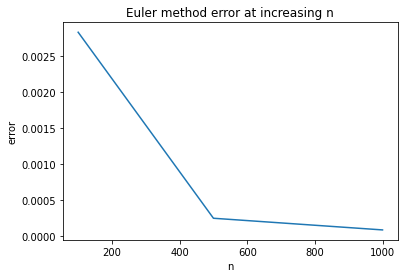

In [5]:
#outputing the graph for the Euler method error

#2 lists for x and y axis
xaxis = [100,500,1000]
errorlist = [error1, error2, error3]

#used 2 list to plot
plt.plot(xaxis,errorlist,label="error")
plt.title("Euler method error at increasing n")
plt.xlabel('n')
plt.ylabel('error')
plt.legend
plt.show

print('\033[1;32m As n increases the error decreases.')

## Exercise 2

### Part 1

Write a function for Runge Kutta 4 methods.

In [6]:
def RungeKutta4(f, n, y0, t0, T):
    h = (T-t0)/n
    t = np.zeros(n+1)
    y = np.zeros(n+1)
    y[0] = y0
    t[0] = t0
    for i in range(1, n+1):
        t[i] = t0 + i * h
        k1 = h*f(t[i-1], y[i-1])
        k2 = h*f(t[i-1]+h/2, y[i-1] + k1/2)
        k3 = h*f(t[i-1]+h/2, y[i-1] + k2/2)
        k4 = h*f(t[i-1]+h, y[i-1] + k3)
        y[i] = y[i-1] + (1/6)*(k1 + 2*k2 + 2*k3 +k4)
    return t, y, h

### Part 2

Write a test for your Runge Kutta 4 function

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05
 2.1  2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75
 2.8  2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3  3.35 3.4  3.45
 3.5  3.55 3.6  3.65 3.7  3.75 3.8  3.85 3.9  3.95 4.   4.05 4.1  4.15
 4.2  4.25 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65 4.7  4.75 4.8  4.85
 4.9  4.95 5.  ] [1.         1.00122943 1.00483742 1.01070798 1.01873076 1.02880079
 1.04081823 1.0546881  1.07032006 1.08762817 1.10653068 1.12694983
 1.14881165 1.1720458  1.19658532 1.22236657 1.24932898 1.27741495
 1.30656968 1.33674104 1.36787946 1.39993777 1.4328711  1.46663679
 1.50119423 1.53650482 1.57253181 1.60924028 1.64659698 1.68457031
 1.72313018 1.76224799 1.80189654 1.84204993 1.88268354 1.92377396
 1.9652989  2.00723718 2.04956863 2.09227409 2.1353353  2.17873492
 2.22245644 2.266

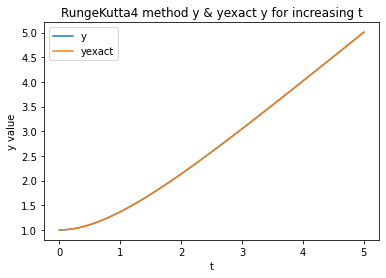

In [7]:
def f(t,y):
    return -y+t+1

def yexact(t):
    return np.exp(-t) + t 


#multivariables Euler method:
t,y,h = RungeKutta4(f,100,1,0,5)
#printing array
print(t,y,h)


#outputing graph
plt.plot(t,y, label = "y")
plt.plot(t,yexact(t), label = "yexact")
plt.title("RungeKutta4 method y & yexact y for increasing t")
plt.xlabel('t')
plt.ylabel('y value')
plt.legend()
plt.show()


In [8]:
#computing error with n increasing

t,y,h = RungeKutta4(f,100,1,0,5)
error1 = h*np.linalg.norm(yexact(t) - y)
print("Error when n=100 is", error1)

t,y,h = RungeKutta4(f,500,1,0,5)
error2 = h*np.linalg.norm(yexact(t) - y)
print("Error when n=500 is", error2)

t,y,h = RungeKutta4(f,1000,1,0,5)
error3 = h*np.linalg.norm(yexact(t) - y)
print("Error when n=1000 is", error3)

Error when n=100 is 6.0629254759382115e-09
Error when n=500 is 4.195778715665546e-12
Error when n=1000 is 1.8469714457668776e-13


 As n increases the error decreases.

 RungeKutta4 method more accurate can be shown in the graphs of both methods as the error in RungeKutta is less when looking
 at both troughs



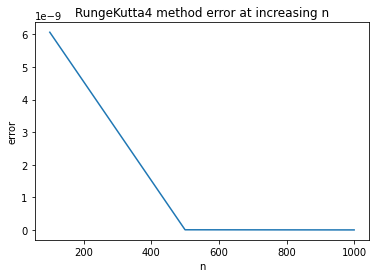

In [9]:
#outputing the graph for the RungeKutta4 method error

#2 lists for x and y axis
xaxis = [100,500,1000]
errorlist = [error1, error2, error3]

#outputing graph
plt.plot(xaxis,errorlist, label = "error")
plt.title("RungeKutta4 method error at increasing n")
plt.xlabel('n')
plt.ylabel('error')
plt.legend
plt.show

print('\033[1;32m As n increases the error decreases.\033[1;32m')
print('\n\033[94m RungeKutta4 method more accurate can be shown in the graphs of both methods as the error in RungeKutta is less when looking\033[94m') 
print('\033[94m at both troughs\033[94m\n')


## Exercise 3

Use Euler/RK4's method to approximate/plot the solutions for each of the following initial-value problems. (Plot your solution for all the values of t)
1. $y'=2e^{-y+t}$, $0\leq t \leq 2$, $y(0)=1/2$, with $h=0.01$
2. $y'=\frac{1+2t}{1+2y}$, $1\leq t \leq 2$, $y(1)=1$, with $h=0.01$
3. $y' = t^{-2}(\cos2t - 2ty)$, $1 \leq t \leq 3$, $y(l) = 2$, with $h=0.01$
4. $ y' = 1+\frac{y}{t},\; 1 < t < 3, \; y(1) = 1$, with $h=0.01$


First function:


Array for Euler method:

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.

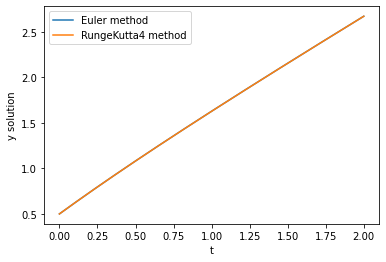


---------------------------------------------------------------

Second function:


Array for Euler method:

[1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11 1.12 1.13
 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25 1.26 1.27
 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39 1.4  1.41
 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53 1.54 1.55
 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67 1.68 1.69
 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81 1.82 1.83
 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95 1.96 1.97
 1.98 1.99 2.  ]
[1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11 1.12 1.13
 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25 1.26 1.27
 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39 1.4  1.41
 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53 1.54 1.55
 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67 1.68 1.69
 1.7  1.71 1.72 1.73 

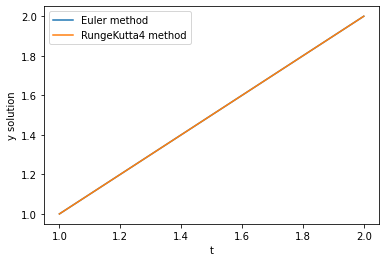


---------------------------------------------------------------

Third function:


Array for Euler method:

[1.    1.005 1.01  1.015 1.02  1.025 1.03  1.035 1.04  1.045 1.05  1.055
 1.06  1.065 1.07  1.075 1.08  1.085 1.09  1.095 1.1   1.105 1.11  1.115
 1.12  1.125 1.13  1.135 1.14  1.145 1.15  1.155 1.16  1.165 1.17  1.175
 1.18  1.185 1.19  1.195 1.2   1.205 1.21  1.215 1.22  1.225 1.23  1.235
 1.24  1.245 1.25  1.255 1.26  1.265 1.27  1.275 1.28  1.285 1.29  1.295
 1.3   1.305 1.31  1.315 1.32  1.325 1.33  1.335 1.34  1.345 1.35  1.355
 1.36  1.365 1.37  1.375 1.38  1.385 1.39  1.395 1.4   1.405 1.41  1.415
 1.42  1.425 1.43  1.435 1.44  1.445 1.45  1.455 1.46  1.465 1.47  1.475
 1.48  1.485 1.49  1.495 1.5   1.505 1.51  1.515 1.52  1.525 1.53  1.535
 1.54  1.545 1.55  1.555 1.56  1.565 1.57  1.575 1.58  1.585 1.59  1.595
 1.6   1.605 1.61  1.615 1.62  1.625 1.63  1.635 1.64  1.645 1.65  1.655
 1.66  1.665 1.67  1.675 1.68  1.685 1.69  1.695 1.7   1.705 1.71  1.715
 1.72  1.725 1.

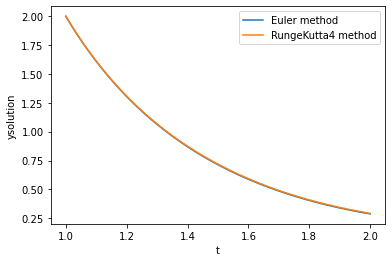


---------------------------------------------------------------

Fourth function:


Array for Euler method:

[1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11 1.12 1.13
 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25 1.26 1.27
 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39 1.4  1.41
 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53 1.54 1.55
 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67 1.68 1.69
 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81 1.82 1.83
 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95 1.96 1.97
 1.98 1.99 2.   2.01 2.02 2.03 2.04 2.05 2.06 2.07 2.08 2.09 2.1  2.11
 2.12 2.13 2.14 2.15 2.16 2.17 2.18 2.19 2.2  2.21 2.22 2.23 2.24 2.25
 2.26 2.27 2.28 2.29 2.3  2.31 2.32 2.33 2.34 2.35 2.36 2.37 2.38 2.39
 2.4  2.41 2.42 2.43 2.44 2.45 2.46 2.47 2.48 2.49 2.5  2.51 2.52 2.53
 2.54 2.55 2.56 2.57 2.58 2.59 2.6  2.61 2.62 2.63 2.64 2.65 2.66 2.67
 2.68 2.69 2.7  2.71 2.72 2.73 2.74 2.

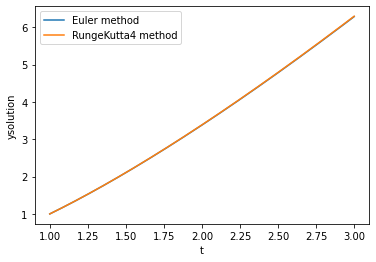

In [10]:
e = np.exp
def f(t,y): 
    return 2*e(t-y)

print("\nFirst function:\n")

t,y,h = eulermethod(f,200,(1/2),0,2)
print('\nArray for Euler method:\n')
print(t)
print(y)
plt.plot(t,y, label = "Euler method")



t,y,h = RungeKutta4(f,200,(1/2),0,2)
print('\nArray for RungeKutta4 method:\n')
print(t)
print(y)
plt.plot(t,y, label = "RungeKutta4 method")
plt.xlabel('t')
plt.ylabel('y solution')
plt.legend()
plt.show()



e = np.exp
def f(t,y): 
    return (1 + (2*t))/(1 + (2*y))

print('\n---------------------------------------------------------------')
print("\nSecond function:\n")

t,y,h = eulermethod(f,100,1,1,2)
print('\nArray for Euler method:\n')
print(t)
print(y)
plt.plot(t,y, label = "Euler method")


t,y,h = RungeKutta4(f,100,1,1,2)
print('\nArray for RungeKutta4 method:\n')
print(t)
print(y)
plt.plot(t,y, label = "RungeKutta4 method")
plt.xlabel('t')
plt.ylabel('y solution')
plt.legend()
plt.show()



cos = np.cos
def f(t,y): 
    return ((t**-2) * (cos(2*t) - (2*t*y)))

print('\n---------------------------------------------------------------')
print("\nThird function:\n")

t,y,h = eulermethod(f,200,2,1,2)
print('\nArray for Euler method:\n')
print(t)
print(y)
plt.plot(t,y, label = "Euler method")

t,y,h = RungeKutta4(f,200,2,1,2)
print('\nArray for RungeKutta4 method:\n')
print(t)
print(y)
plt.plot(t,y, label = "RungeKutta4 method")
plt.xlabel('t')
plt.ylabel('ysolution')
plt.legend()
plt.show()



def f(t,y): 
    return (1 + (y / t))

print('\n---------------------------------------------------------------')
print("\nFourth function:\n")

t,y,h = eulermethod(f,200,1,1,3)
print('\nArray for Euler method:\n')
print(t)
print(y)
plt.plot(t,y, label = "Euler method")

t,y,h = RungeKutta4(f,200,1,1,3)
print('\nArray for RungeKutta4 method:\n')
print(t)
print(y)
plt.plot(t,y, label = "RungeKutta4 method")
plt.xlabel('t')
plt.ylabel('ysolution')
plt.legend()
plt.show()

## Exercise 4

Use Euler/RK4's method to approximate/plot the solutions for each of the following initial-value problem.
$$ y'= \frac{2-2ty}{t^2+1}, ~~~~ 1\leq t \leq 2, ~~~~ y(1)=2, ~~~~ h=0.05$$
The actual solutions to die initial-value is given here. Compute/plot the actual error of your approximation and bound the error.
$$y(t)=\frac{2t+2}{t^2+1}$$


Array for Euler method:

[1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4  1.45 1.5  1.55 1.6  1.65
 1.7  1.75 1.8  1.85 1.9  1.95 2.  ]
[2.         1.95       1.90017836 1.85084821 1.80225939 1.75460729
 1.70804108 1.66267106 1.61857519 1.57580475 1.53438921 1.49434048
 1.45565634 1.41832348 1.38231988 1.34761696 1.31418115 1.28197535
 1.25095998 1.22109395 1.19233532]


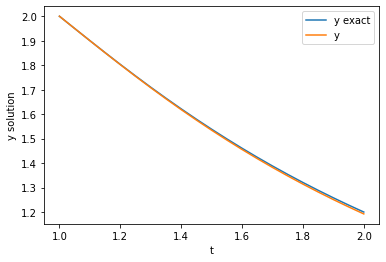


Error for Euler method:  0.0010694574794468746
The error is bounded y = 2

Array for RungeKutta4 method:

[1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4  1.45 1.5  1.55 1.6  1.65
 1.7  1.75 1.8  1.85 1.9  1.95 2.  ]
[2.         1.95005945 1.90045249 1.85145318 1.80327869 1.75609756
 1.71003718 1.66519044 1.62162163 1.57937148 1.53846155 1.49889788
 1.46067417 1.42377435 1.38817482 1.35384616 1.32075473 1.28886377
 1.2581345  1.22852682 1.20000001]


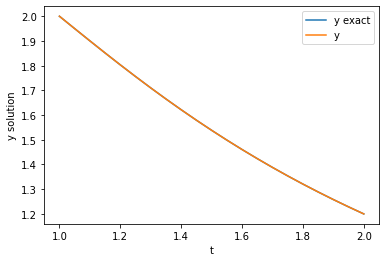

Error for RungeKutta4 method:  1.6657831868831842e-09
The error is bounded y = 2


In [11]:
def f(t,y):
    return (2-(2*t*y)) / ((t**2)+1)
def yexact(t):
    return ((2*t)+2) / ((t**2)+1)


#multi variables to use in method:
t,y,h = eulermethod(f, 20, 2, 1, 2)
print('\nArray for Euler method:\n')

#print statement for arrays
print(t)
print(y)

#outputing graph
plt.plot(t, yexact(t) , label="y exact")
plt.plot(t,y, label="y")
plt.xlabel('t')
plt.ylabel('y solution')
plt.legend()
plt.show()

error = h*np.linalg.norm(yexact(t) - y)
print("\nError for Euler method: ", error)
print("The error is bounded y = 2")

t,y,h = RungeKutta4(f, 20, 2, 1, 2)
print('\nArray for RungeKutta4 method:\n')
print(t)
print(y)

#outputing graph
plt.plot(t, yexact(t) , label="y exact")
plt.plot(t,y, label="y")
plt.xlabel('t')
plt.ylabel('y solution')
plt.legend()
plt.show()

error = h*np.linalg.norm(yexact(t) - y)
print("Error for RungeKutta4 method: ", error)
print("The error is bounded y = 2")

## Exercise 5

Given the initial-value problem 
$$y'=-y+t+1,  \; 0 \leq t \leq 4, \; y(0)=1$$
The exact solution is $y(t)=e^{-t}+t$.
Approximate y(4) using Euler/RK4's method with h = 0.1, h =0.01, and h = 0.001. 

In [16]:
e=np.exp

def f(t,y):
    return -y+t+1

def yexact(t):
    return e(-t) + t

t,y,h = eulermethod(f, 40, 1, 0, 4)
print("\ny(4) Euler method approximation for h = 0.1: ", y[40])

t,y,h = RungeKutta4(f, 40, 1, 0, 4)
print("y(4) RungeKutta4 method approximation for h = 0.1: ", y[40])

t,y,h = eulermethod(f, 400, 1, 0, 4)
print("\ny(4) Euler method approximation for h = 0.01: ", y[400])

t,y,h = RungeKutta4(f, 400, 1, 0, 4)
print("y(4) RUngeKutta4 method approximation for h = 0.01: ", y[400])

t,y,h = eulermethod(f, 4000, 1, 0, 4)
print("\ny(4) Euler method approximation for h = 0.001: ", y[4000])

t,y,h = RungeKutta4(f, 4000, 1, 0, 4)
print("y(4) RungeKutta4 method approximation for h = 0.001: ", y[4000])

print("\nY exact(4) is: ", yexact(4))
print('\n\033[94mSo it can be seen that RungeKutta4 method is more accurate in all cases!\n\033[94m')


y(4) Euler method approximation for h = 0.1:  4.014780882941435
y(4) RungeKutta4 method approximation for h = 0.1:  4.0183157052532055

y(4) Euler method approximation for h = 0.01:  4.017950553275045
y(4) RUngeKutta4 method approximation for h = 0.01:  4.01831563889489

y(4) Euler method approximation for h = 0.001:  4.01827901982749
y(4) RungeKutta4 method approximation for h = 0.001:  4.018315638888728

Y exact(4) is:  4.018315638888734

So it can be seen that RungeKutta4 method is more accurate in all cases!



### Exericse 6

Lokta-Volterra Equations:
$$\begin{cases}
 & \displaystyle{\frac{dx}{dt} = \alpha x - \beta xy } \\
 & \displaystyle{\frac{dy}{dt} = \delta xy - \gamma y}
 \end{cases}$$
 where
* x is the number of prey
* y is the number of some predator
* $\alpha$, $\beta$, $\gamma$, $delta$ are positive real parameters describing the interaction of the two species.
* The prey are assumed to have an unlimited food supply and to reproduce exponentially, unless subject to predation; this exponential growth is represented in the equation above by the term $\alpha x$. 
* The rate of predation upon the prey is represented above by $\beta xy$. If either x or y is zero, then there can be no predation.
* $\delta xy$ represents the growth of the predator population.
* $\gamma y$ represents the loss rate of the predators due to either natural death or emigration, it leads to an exponential decay in the absence of prey


1. Solve the Lokta-Volterra equations with  the 4 different methods, with  $\alpha= 2/3$, $\beta = 4/3$, $\gamma = 1 = \delta$
2. Try another cool set of value and solve it.


Lokta-Volterra equations: 



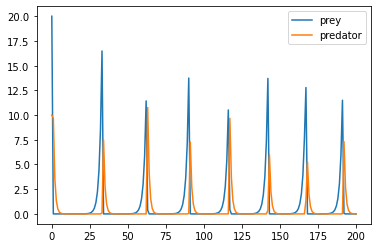

----------------------------------------

The set of data I picked: 



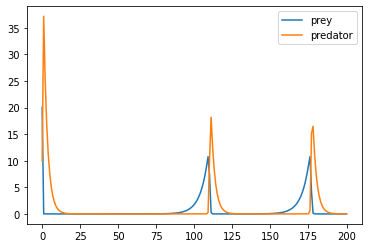

In [17]:
a = 2/3
b = 4/3
g = 1
d = 1

def f(t,y):
    return np.array([a*y[0]-b*y[0]*y[1], d*y[0]*y[1] - g*y[1]])

sol = solve_ivp(f,[0,200],[20,10], t_eval = np.arange(0,201,1))

print("\n\033[94mLokta-Volterra equations: \033[94m\n")

plt.plot(sol.t,sol.y[0], label = 'prey')
plt.plot(sol.t,sol.y[1], label = 'predator')
plt.legend()
plt.show()




print('----------------------------------------')



print("\n\033[94mThe set of data I picked: \033[94m\n")


#my cool set of values!:
a = 0.2
b = 0.2
g = 0.4
d = 0.4

def f(t,y):
    return np.array([a*y[0]-b*y[0]*y[1], d*y[0]*y[1] - g*y[1]])

sol = solve_ivp(f,[0,200],[20,10], t_eval = np.arange(0,201,1))
plt.plot(sol.t,sol.y[0], label = 'prey')
plt.plot(sol.t,sol.y[1], label = 'predator')
plt.legend()
plt.show()

## Exercise 7
 
 Competitive Lotka–Volterra equations. 4 species competing for the same resource:
$$\frac{dx_i}{dt}=r_ix_i\left(1-\sum_{j=1}^4 \alpha_{ij}x_j\right)  \mbox{ for  } i=1,2,3,4 $$

* $r_{i}$ is the rate at which the species $i$ reproduce.
* $\alpha_{ij}$ represents the effect species j has on the population of species i.

1. Solve the Competitive Lokta-Volterrra equations with
  $$r = \begin{bmatrix}
          1\\0.72\\1.53\\1.27
         \end{bmatrix}, \enspace \alpha=\begin{bmatrix}
         1 & 1.09 & 1.52 & 0\\
         0& 1 & 0.44 & 1.36 \\
         2.33 & 0 & 1 & 0.47 \\
         1.21 & 0.51 & 0.35 & 1\\
         \end{bmatrix}$$
2.  Solve another cool one.

[[0.25       0.2635062  0.27259359 0.28346301 0.29829269 0.3175108
  0.34058462 0.3656746  0.38986953 0.41015445 0.42171239 0.42282998
  0.41480043 0.39858763 0.3778557  0.35576614 0.33477885 0.31604332
  0.30012031 0.28707455 0.27625655 0.26696909 0.25834277 0.24991432
  0.24108349 0.23134034 0.22106581 0.21052516 0.20001297 0.19008153
  0.18113678 0.17396396 0.16877806 0.16597148 0.1663732  0.17004217
  0.17810876 0.19160307 0.21191033 0.24143256 0.28332405 0.3398469
  0.41158022 0.4903551  0.55849617 0.59377721 0.58867549 0.54987428
  0.4924855  0.4307607  0.37440798 0.32802042 0.29287175 0.26811073
  0.25273829 0.24528762 0.24442961 0.24880575 0.25667628 0.26651701
  0.27697304 0.28629382 0.29413679 0.30091671 0.30584103 0.30940056
  0.31177044 0.3128642  0.31308852 0.31234969 0.31073563 0.30863145
  0.30596227 0.30265043 0.29905448 0.29553431 0.29171787 0.28772937
  0.28414222 0.28068161 0.27726454 0.27450079 0.27242559 0.27063989
  0.26974339 0.27023505 0.27157586 0.27429166 0.27

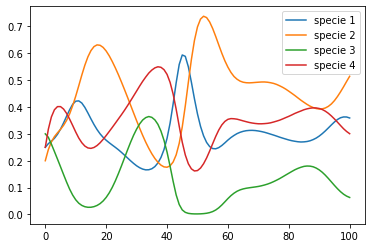


----------------------------------------------

[[0.25       0.31725239 0.43018226 0.50815839 0.5416202  0.55205832
  0.55371975 0.55179115 0.54802193 0.54338333 0.53858068 0.53389923
  0.52781628 0.5241509  0.5195769  0.51595319 0.51264856 0.50971287
  0.50720308 0.50584344 0.50273958 0.50256191 0.50127738 0.50115803
  0.50075307 0.50091695 0.50053548 0.50129151 0.50080231 0.50183477
  0.50149186 0.50183277 0.50223827 0.50198429 0.50248895 0.50257743
  0.5027129  0.50295602 0.50293636 0.50302683 0.50337652 0.50237744
  0.50322412 0.50270963 0.50311966 0.50288515 0.50321341 0.50266588
  0.50361181 0.50235926 0.50296574 0.50259516 0.50298387 0.50271514
  0.50312754 0.50266841 0.50339276 0.50293655 0.50232736 0.50286334
  0.50276704 0.50280944 0.50299709 0.5028733  0.50286077 0.50309588
  0.50250133 0.50346179 0.50212015 0.50338748 0.5022146  0.50302569
  0.50245248 0.50301045 0.50261293 0.50312219 0.50259187 0.50333439
  0.50266735 0.50274902 0.50276816 0.50286224 0.50276936 0.50301747

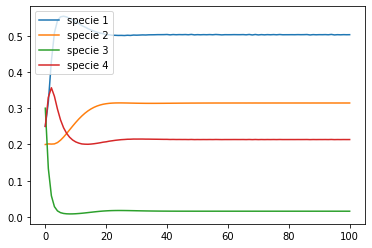

In [18]:

def f(t,y):
    return np.array([1*y[0]*(1-1*y[0] - 1.09*y[1] - 1.52*y[2] - 0*y[3]), 0.72*y[1]*(1-0*y[0] - 1*y[1] - 0.44*y[2] - 1.36*y[3]), 1.53*y[2]*(1-2.33*y[0] - 0*y[1] - 1*y[2] - 0.47*y[3]), 1.27*y[3]*(1-1.21*y[0] - 0.51*y[1] - 0.35*y[2] - 1*y[3])])
sol = solve_ivp(f,[0,100],[0.25,0.20,0.30,0.25], t_eval = np.arange(0,101,1))
print(sol.y)


print("\n\033[94mCompetitive Lokta-Volterrra equations: \033[94m\n")
plt.plot(sol.t,sol.y[0], label='specie 1')
plt.plot(sol.t,sol.y[1], label='specie 2')
plt.plot(sol.t,sol.y[2], label='specie 3')
plt.plot(sol.t,sol.y[3], label='specie 4')
plt.legend()
plt.show()



print('\n----------------------------------------------\n')




def f(t,y):
    return np.array([2*y[0]*(1-1.5*y[0] - 0.7*y[1] - 1.6*y[2] - 0*y[3]), 0.35*y[1]*(1-0.2*y[0] - 1.85*y[1] - 0.63*y[2] - 1.44*y[3]), 1.55*y[2]*(1-0.34*y[0] - 0.23*y[1] - 1.9*y[2] - 3.4*y[3]), 1.26*y[3]*(1-1.3*y[0] - 0.41*y[1] - 0.23*y[2] - 1*y[3])])
sol = solve_ivp(f,[0,100],[0.25,0.20,0.30,0.25], t_eval = np.arange(0,101,1))
print(sol.y)

print("\n\033[94mThe set of data I picked: \033[94m\n")
plt.plot(sol.t,sol.y[0], label='specie 1')
plt.plot(sol.t,sol.y[1], label='specie 2')
plt.plot(sol.t,sol.y[2], label='specie 3')
plt.plot(sol.t,sol.y[3], label='specie 4')
plt.legend()
plt.show()

## Exercise 8

The SIR model. To learn more you can see [Compartemental Model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology).

* $S(t)$: the number of individuals susceptible of contracting the infection at time $t$,
* $I(t)$: the number of individuals that are alive and infected at time t;
* $R(t)$: the cumulative number of individuals that recovered from the disease up to time t;

In addition, $N$ is the total number of people in the area at time $t$ with $N = S(t) + I(t) + R(t)$.
The SIRD model is given by the following expressions:
\begin{equation} 
\begin{split}
\dfrac{dS}{dt} &=  -\frac{\beta I S}{N}, \\ 
\dfrac{dI}{dt} &=  \frac{\beta I S}{N} - \gamma I\\
\dfrac{dR}{dt} &= \gamma I,\\
\end{split}
\end{equation}

Pick $\beta$, $\gamma$, $\mu$ between $0$ and $1$ and solve this epidemic problem. What is the percentage of Recovered/Immuned indivual needed for the desease to stop spreading?


Compartemental Model:

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200]
[[3.39760810e+07 3.39758778e+07 3.39756394e+07 3.39753598e+07
  3.39750315e+07 3.39746465e+07 3.39741949e+07 3.39736651e+07
  3.39730432e+07 3.39723134e+07 3.3

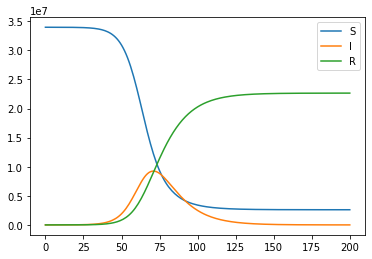

In [15]:
b = 0.25
g = 0.065
u = 0.025
n = 34000000

print("\n\033[94mCompartemental Model:\033[94m\n")

def f(t,y):
    return np.array([-b*y[1]*y[0]/n, b*y[1]*y[0]/n - g*y[1] - u*y[1], g*y[1]])


sol = solve_ivp(f,[0,200],[33976081,750,0], t_eval = np.arange(0,201,1))

print(sol.t)
print(sol.y)


plt.plot(sol.t,sol.y[0], label = 'S')
plt.plot(sol.t,sol.y[1], label = 'I')
plt.plot(sol.t,sol.y[2], label = 'R')
plt.legend()
plt.show()

## BONUS: Exercise 9
Use the Euler Implicit method to approximate/plot the solutions to each of the following initial-value. See [Euler Implicite](https://en.wikipedia.org/wiki/Backward_Euler_method).
1. $y' = -ty + 4t/y$, $0 \leq t \leq 1$, $y(0) = 1$, with $h = 0.1$
2. $y' = \frac{y^2+y}{t}$, $1 \leq  t  \leq 3$, $y(l) = -2$, with $h = 0.2$ 